<a href="https://colab.research.google.com/github/Redcoder815/Deep_Learning_PyTorch/blob/main/MultilayerPerceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0 0.6821218729019165
100 0.4164099395275116
200 0.3742830157279968
300 0.18926596641540527
400 0.23604118824005127
500 0.3463623821735382
600 0.13938955962657928
700 0.07935173809528351
800 0.08735400438308716
900 0.0528513565659523


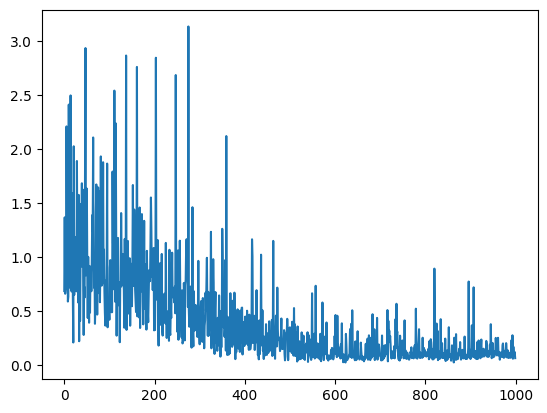

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
class MLP(nn.Module):
    def __init__(self, layer_sizes, activation=F.relu):
        """
        layer_sizes: [input_dim, h1, h2, ..., output_dim]
        """
        super().__init__()
        self.activation = activation

        self.weights = nn.ParameterList()
        self.biases = nn.ParameterList()

        for in_dim, out_dim in zip(layer_sizes[:-1], layer_sizes[1:]):
            W = nn.Parameter(torch.randn(in_dim, out_dim) * 0.01)
            b = nn.Parameter(torch.zeros(out_dim))
            self.weights.append(W)
            self.biases.append(b)

    def forward(self, x):
        for i, (W, b) in enumerate(zip(self.weights, self.biases)):
            x = x @ W + b
            if i < len(self.weights) - 1:  # no activation on last layer
                x = self.activation(x)
        return x


model = MLP([2, 16, 1])
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.MSELoss()

train_loss = []
for step in range(1000):
    x = torch.randn(32, 2)
    y = (x[:, 0] * x[:, 1]).unsqueeze(1)  # some target function

    pred = model(x)
    loss = loss_fn(pred, y)
    train_loss.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    if step % 100 == 0:
        print(step, loss.item())

import matplotlib.pyplot as plt
plt.plot(train_loss)
plt.show()

# Task
Assess model performance and generalization by training with training and validation sets, tracking and plotting both losses, and summarizing the findings.

## Generate and Split Data

### Subtask:
Generate a larger dataset and split it into training and validation sets.


**Reasoning**:
I will generate a larger dataset for features `x` and target `y` using the specified function, then split this dataset into training and validation sets according to an 80/20 ratio. Finally, I will print the shapes of the resulting tensors to confirm the split.



In [12]:
import torch

# 1. Generate a larger dataset (1000 samples, 2 features)
n_samples = 1000
x = torch.randn(n_samples, 2)
y = (x[:, 0] * x[:, 1]).unsqueeze(1) # Target function

print(f"Original x shape: {x.shape}")
print(f"Original y shape: {y.shape}\n")

# 2. Determine split ratio
train_ratio = 0.8
val_ratio = 0.2

# Calculate split sizes
train_size = int(n_samples * train_ratio)
val_size = n_samples - train_size # Ensure total samples match

# 3. Split the generated x and y tensors
x_train = x[:train_size]
y_train = y[:train_size]
x_val = x[train_size:]
y_val = y[train_size:]

# Print shapes to confirm the split
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_val shape: {x_val.shape}")
print(f"y_val shape: {y_val.shape}")

Original x shape: torch.Size([1000, 2])
Original y shape: torch.Size([1000, 1])

x_train shape: torch.Size([800, 2])
y_train shape: torch.Size([800, 1])
x_val shape: torch.Size([200, 2])
y_val shape: torch.Size([200, 1])


## Train Model with Validation

### Subtask:
Modify the training loop to train the model on the training set and periodically evaluate its performance on the validation set, tracking both training and validation loss.


**Reasoning**:
I will update the model training loop to incorporate training and validation sets, define epochs and batch size, shuffle data, calculate and track both training and validation losses per epoch, and print progress periodically, as instructed in the subtask.



In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Re-define MLP if it's not available in the current kernel state (though it should be)
class MLP(nn.Module):
    def __init__(self, layer_sizes, activation=F.relu):
        super().__init__()
        self.activation = activation

        self.weights = nn.ParameterList()
        self.biases = nn.ParameterList()

        for in_dim, out_dim in zip(layer_sizes[:-1], layer_sizes[1:]):
            W = nn.Parameter(torch.randn(in_dim, out_dim) * 0.01)
            b = nn.Parameter(torch.zeros(out_dim))
            self.weights.append(W)
            self.biases.append(b)

    def forward(self, x):
        for i, (W, b) in enumerate(zip(self.weights, self.biases)):
            x = x @ W + b
            if i < len(self.weights) - 1:  # no activation on last layer
                x = self.activation(x)
        return x

# Initialize model, optimizer, and loss function
# (Assuming these are reset or need to be re-initialized for a fresh training run)
model = MLP([2, 16, 1])
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.MSELoss()

# 1. Initialize lists to store losses
train_losses_per_epoch = []
val_losses_per_epoch = []

# 2. Define number of epochs and batch size
num_epochs = 1000
batch_size = 32

# Get the number of training samples
n_train_samples = x_train.shape[0]

# 3. Start an outer loop that iterates for the defined number of epochs
for epoch in range(num_epochs):
    # 4. Set the model to training mode
    model.train()

    # 5. Shuffle the training data at the beginning of each epoch
    # Create a permutation of indices
    permutation = torch.randperm(n_train_samples)
    shuffled_x_train = x_train[permutation]
    shuffled_y_train = y_train[permutation]

    epoch_train_loss = 0.0
    num_batches = 0

    # 6. Iterate through mini-batches of the shuffled training data
    for i in range(0, n_train_samples, batch_size):
        # a. Get a batch of input features and target labels
        x_batch = shuffled_x_train[i:i + batch_size]
        y_batch = shuffled_y_train[i:i + batch_size]

        # b. Perform a forward pass
        pred = model(x_batch)

        # c. Calculate the training loss for the batch
        loss = loss_fn(pred, y_batch)

        # d. Accumulate the batch training loss
        epoch_train_loss += loss.item()
        num_batches += 1

        # e. Perform backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # 7. Calculate average training loss for the epoch and append it
    avg_train_loss = epoch_train_loss / num_batches
    train_losses_per_epoch.append(avg_train_loss)

    # 8. Set the model to evaluation mode
    model.eval()

    # 9. Disable gradient calculations for the validation step
    with torch.no_grad():
        # 10. Perform a forward pass with the entire x_val dataset
        val_pred = model(x_val)

        # 11. Calculate the validation loss and append it
        val_loss = loss_fn(val_pred, y_val).item()
        val_losses_per_epoch.append(val_loss)

    # 12. Periodically print the current epoch, train loss, and validation loss
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Val Loss: {val_loss:.4f}')


Epoch [100/1000], Train Loss: 0.0239, Val Loss: 0.0311
Epoch [200/1000], Train Loss: 0.0026, Val Loss: 0.0049
Epoch [300/1000], Train Loss: 0.0008, Val Loss: 0.0018
Epoch [400/1000], Train Loss: 0.0005, Val Loss: 0.0010
Epoch [500/1000], Train Loss: 0.0005, Val Loss: 0.0008
Epoch [600/1000], Train Loss: 0.0004, Val Loss: 0.0008
Epoch [700/1000], Train Loss: 0.0005, Val Loss: 0.0007
Epoch [800/1000], Train Loss: 0.0005, Val Loss: 0.0008
Epoch [900/1000], Train Loss: 0.0004, Val Loss: 0.0008
Epoch [1000/1000], Train Loss: 0.0005, Val Loss: 0.0007


## Plot Training and Validation Loss

### Subtask:
Visualize both the training loss and validation loss over time to observe if the model is overfitting or generalizing well. Ensure the plot has a legend.


**Reasoning**:
To visualize the training and validation loss, I will use `matplotlib.pyplot` to create a plot as instructed. This will involve plotting both loss lists against epoch numbers, adding appropriate labels, a title, and a legend.



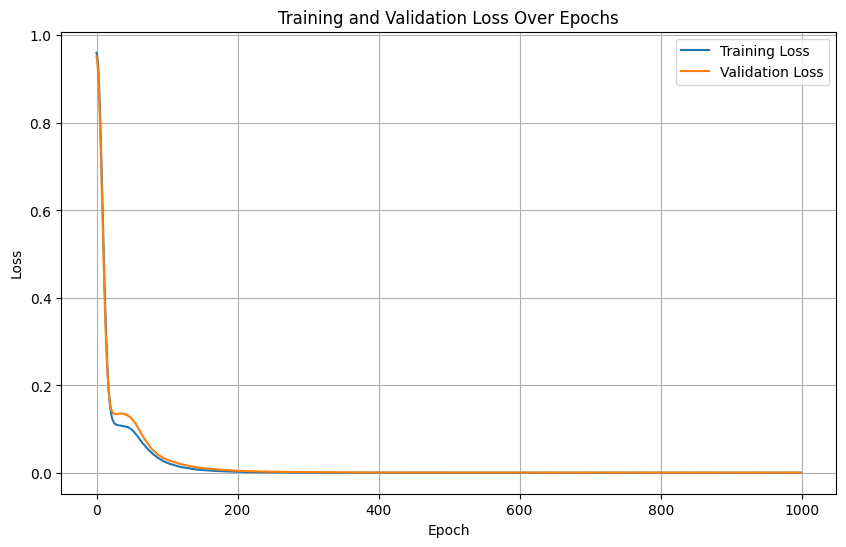

In [14]:
import matplotlib.pyplot as plt

# Create a figure and an axes object
plt.figure(figsize=(10, 6))

# Plot training loss
plt.plot(train_losses_per_epoch, label='Training Loss')

# Plot validation loss
plt.plot(val_losses_per_epoch, label='Validation Loss')

# Add title and labels
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Add a legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

In [19]:
import torch
from torch import nn

class MultilayerPerceptron(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MultilayerPerceptron, self).__init__()
        # Define layers
        self.layers = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, output_size)
        )

    def forward(self, x):
        # For this dataset, input x already has the correct shape, no flattening needed.
        # If we had, for example, 2D image data, we would flatten it here.
        # x = torch.flatten(x, start_dim=1) # Uncomment and adapt if flattening is truly needed
        return self.layers(x)

# Initialize model with input_size=2 and output_size=1 for the regression task
model = MultilayerPerceptron(input_size=2, hidden_size=16, output_size=1)


In [20]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Re-initialize the model to apply changes from the previous cell
# This ensures the model with correct input_size is used
model = MultilayerPerceptron(input_size=2, hidden_size=16, output_size=1)

# For regression tasks, MSELoss is appropriate. The original loss_fn was MSELoss.
# CrossEntropyLoss is for classification and is not suitable here.
criterion = nn.MSELoss() # Changed to MSELoss for regression
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

train_losses_per_epoch = []
val_losses_per_epoch = []

# Define number of epochs and batch size
num_epochs = 1000
batch_size = 32

# Get the number of training samples
n_train_samples = x_train.shape[0]

# Start an outer loop that iterates for the defined number of epochs
for epoch in range(num_epochs):
    # Set the model to training mode
    model.train()

    # Shuffle the training data at the beginning of each epoch
    permutation = torch.randperm(n_train_samples)
    shuffled_x_train = x_train[permutation]
    shuffled_y_train = y_train[permutation]

    epoch_train_loss = 0.0
    num_batches = 0

    # Iterate through mini-batches of the shuffled training data
    for i in range(0, n_train_samples, batch_size):
        # Get a batch of input features and target labels
        x_batch = shuffled_x_train[i:i + batch_size]
        y_batch = shuffled_y_train[i:i + batch_size]

        # Perform a forward pass
        pred = model(x_batch)

        # Calculate the training loss for the batch
        # Use criterion (now MSELoss) instead of loss_fn to be consistent with the re-initialization
        loss = criterion(pred, y_batch)

        # Accumulate the batch training loss
        epoch_train_loss += loss.item()
        num_batches += 1

        # Perform backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Calculate average training loss for the epoch and append it
    avg_train_loss = epoch_train_loss / num_batches
    train_losses_per_epoch.append(avg_train_loss)

    # Set the model to evaluation mode
    model.eval()

    # Disable gradient calculations for the validation step
    with torch.no_grad():
        # Perform a forward pass with the entire x_val dataset
        val_pred = model(x_val)

        # Calculate the validation loss and append it
        # Use criterion (now MSELoss)
        val_loss = criterion(val_pred, y_val).item()
        val_losses_per_epoch.append(val_loss)

    # Periodically print the current epoch, train loss, and validation loss
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Val Loss: {val_loss:.4f}')


Epoch [100/1000], Train Loss: 0.0036, Val Loss: 0.0071
Epoch [200/1000], Train Loss: 0.0013, Val Loss: 0.0028
Epoch [300/1000], Train Loss: 0.0010, Val Loss: 0.0022
Epoch [400/1000], Train Loss: 0.0008, Val Loss: 0.0019
Epoch [500/1000], Train Loss: 0.0007, Val Loss: 0.0013
Epoch [600/1000], Train Loss: 0.0006, Val Loss: 0.0019
Epoch [700/1000], Train Loss: 0.0008, Val Loss: 0.0015
Epoch [800/1000], Train Loss: 0.0012, Val Loss: 0.0036
Epoch [900/1000], Train Loss: 0.0006, Val Loss: 0.0022
Epoch [1000/1000], Train Loss: 0.0005, Val Loss: 0.0016


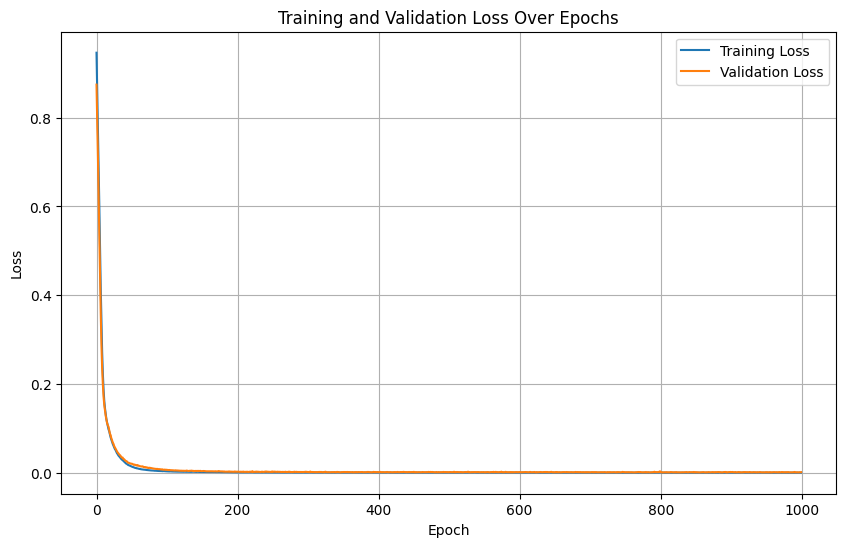

In [23]:
import matplotlib.pyplot as plt

# Create a figure and an axes object
plt.figure(figsize=(10, 6))

# Plot training loss
plt.plot(train_losses_per_epoch, label='Training Loss')

# Plot validation loss
plt.plot(val_losses_per_epoch, label='Validation Loss')

# Add title and labels
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Add a legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

In [24]:
import torch
import torch.nn as nn

# 1. Define the MLP class
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.hidden = nn.Linear(input_size, hidden_size)
        self.activation = nn.ReLU()
        self.output = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.hidden(x)
        x = self.activation(x)
        x = self.output(x)
        return x

# 2. Testing Setup
input_dim = 10     # Number of input features
hidden_dim = 5     # Number of neurons in hidden layer
output_dim = 2     # Number of output classes/values
batch_size = 4     # Number of samples in a batch

# 3. Initialize the model
model = MLP(input_dim, hidden_dim, output_dim)

# 4. Create dummy input data (Random tensor)
# Shape: [batch_size, input_dim]
dummy_input = torch.randn(batch_size, input_dim)

# 5. Perform a forward pass
output = model(dummy_input)

# 6. Verify Results
print(f"Input Shape: {dummy_input.shape}")   # Expected: torch.Size([4, 10])
print(f"Output Shape: {output.shape}")      # Expected: torch.Size([4, 2])
print(f"Output Tensor:\n{output}")


Input Shape: torch.Size([4, 10])
Output Shape: torch.Size([4, 2])
Output Tensor:
tensor([[0.9948, 0.6578],
        [0.5038, 0.4349],
        [0.8314, 0.3442],
        [0.4165, 0.4338]], grad_fn=<AddmmBackward0>)
